In [1]:
#Analyze Diwali sales data to improve customer experience and sales

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("D:/Deepa/Downloads/Python_Diwali_Sales_Analysis-main/Python_Diwali_Sales_Analysis-main/Diwali Sales Data.csv",encoding="unicode_escape") 
print(df) 

       User_ID    Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0      1002903    Sanskriti  P00125942      F     26-35   28               0   
1      1000732       Kartik  P00110942      F     26-35   35               1   
2      1001990        Bindu  P00118542      F     26-35   35               1   
3      1001425       Sudevi  P00237842      M      0-17   16               0   
4      1000588         Joni  P00057942      M     26-35   28               1   
...        ...          ...        ...    ...       ...  ...             ...   
11246  1000695      Manning  P00296942      M     18-25   19               1   
11247  1004089  Reichenbach  P00171342      M     26-35   33               0   
11248  1001209        Oshin  P00201342      F     36-45   40               0   
11249  1004023       Noonan  P00059442      M     36-45   37               0   
11250  1002744      Brumley  P00281742      F     18-25   19               0   

                State      Zone       O

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [6]:
df.drop(["Status","unnamed1"],axis=1,inplace=True)

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [10]:
df["Amount"]= df["Amount"].astype(int)

In [11]:
df["Amount"].dtypes

dtype('int64')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\Deepa\AppData\Local\Temp\ipykernel_6620\204274917.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  a = sns.countplot(data = df,x = "Gender",palette="Set2")


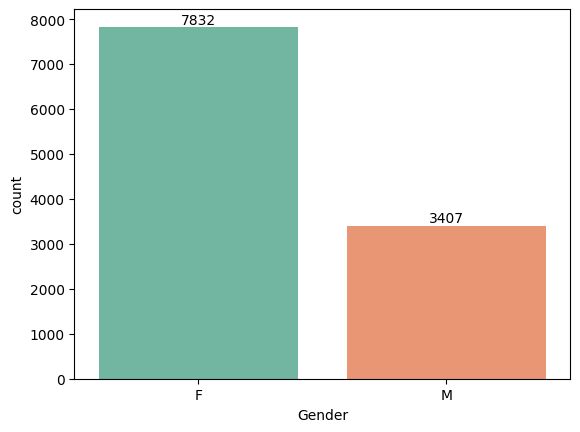

In [13]:
a = sns.countplot(data = df,x = "Gender",palette="Set2")

for bars in a.containers:
    a.bar_label(bars)
plt.show()

Gender
F    74335853
M    31913276
Name: Amount, dtype: int64


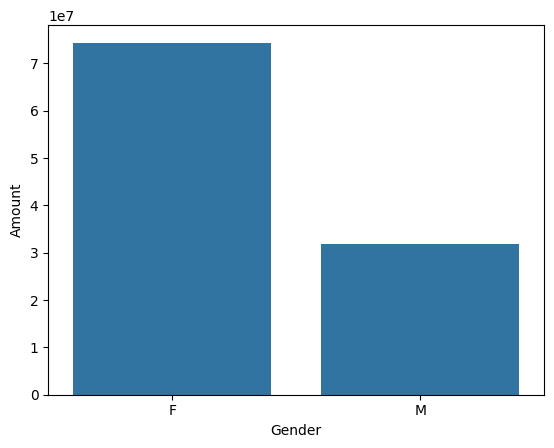

In [14]:
profit_on_gender = df.groupby("Gender")["Amount"].sum()
print(profit_on_gender)
sns.barplot(profit_on_gender)
plt.show()

=we can say that purchasing power is females more than of man

In [15]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

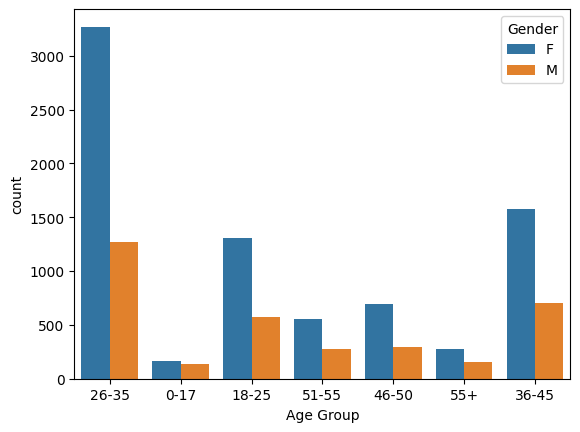

In [16]:
ag = sns.countplot(data = df, x = "Age Group",hue= "Gender")

for bars in ag.containers:
    a.bar_label(bars)

C:\Users\Deepa\AppData\Local\Temp\ipykernel_6620\3546831246.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sale_age,x = "Age Group",y = "Amount",palette="viridis")


<Axes: xlabel='Age Group', ylabel='Amount'>

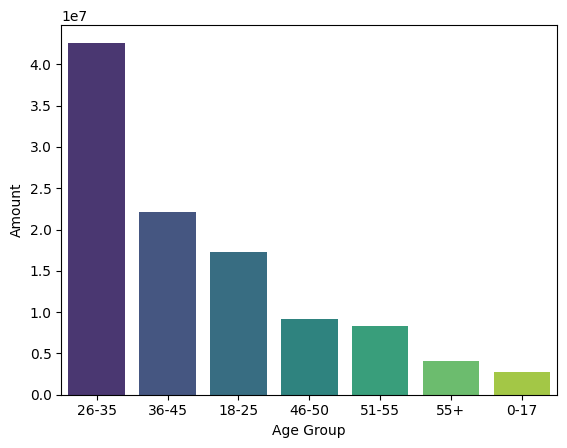

In [17]:
sale_age = df.groupby(["Age Group"], as_index=False)["Amount"].sum().sort_values(by = "Amount",ascending = False)
sns.barplot(data = sale_age,x = "Age Group",y = "Amount",palette="viridis")

=Female whoes are 26- 35 age group parchase power more than others

C:\Users\Deepa\AppData\Local\Temp\ipykernel_6620\610037874.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sale_State,x = "State",y = "Orders",palette="GnBu")


<Axes: xlabel='State', ylabel='Orders'>

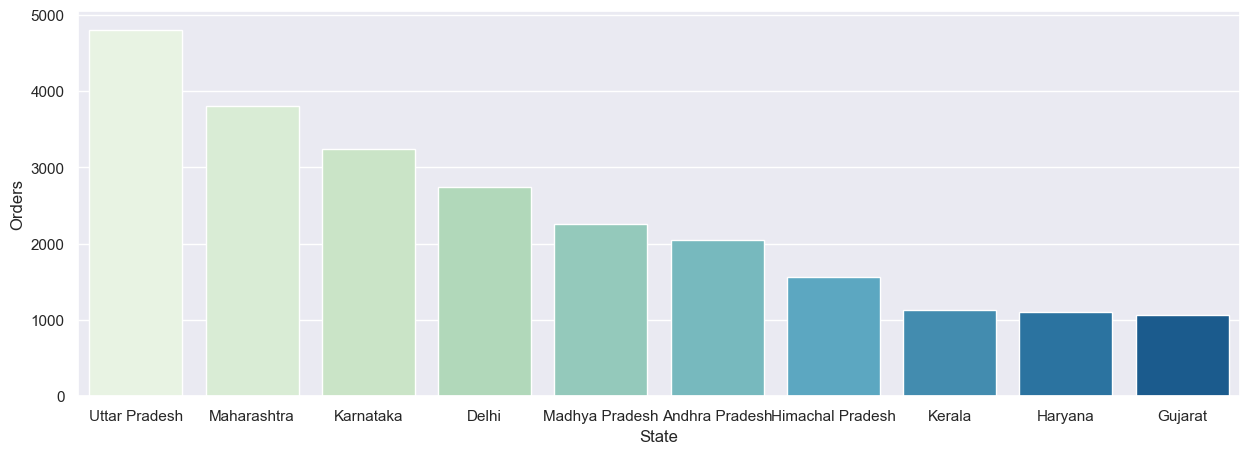

In [18]:
sale_State = df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by = "Orders",ascending=False).head(10)
#print(sale_State)
sns.set(rc={"figure.figsize":(15,5)})
sns.barplot(data = sale_State,x = "State",y = "Orders",palette="GnBu")


C:\Users\Deepa\AppData\Local\Temp\ipykernel_6620\1671936802.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sale_state_amount, x = "State", y = "Amount",palette="OrRd")


<Axes: xlabel='State', ylabel='Amount'>

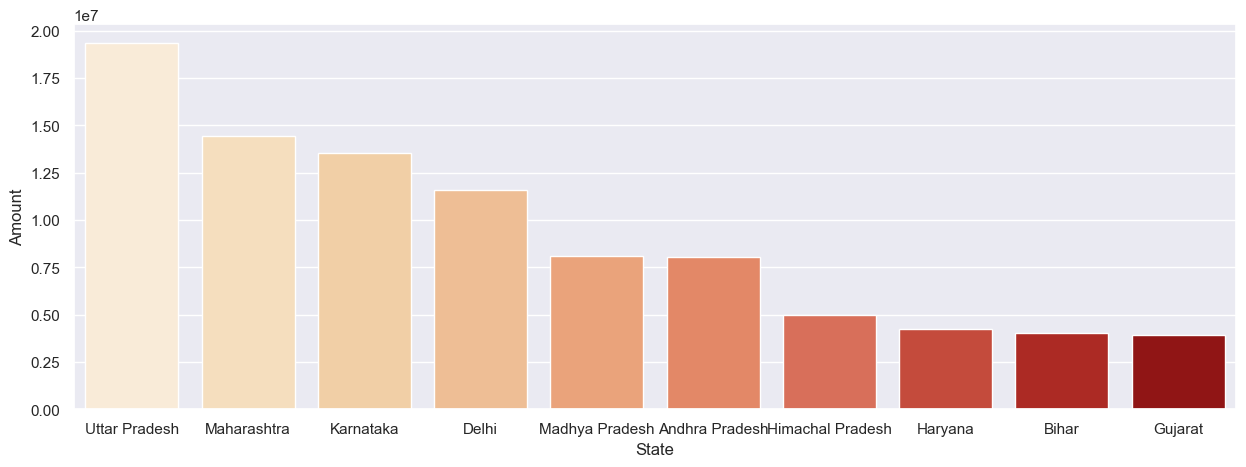

In [19]:
sale_state_amount = df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by ="Amount",ascending=False ).head(10)
sns.barplot(data = sale_state_amount, x = "State", y = "Amount",palette="OrRd")

The woman whoes age group is 26-35 yrs from UP,Maharashtra and Karnataka purchasing power in more than other of states

In [20]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [21]:
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924


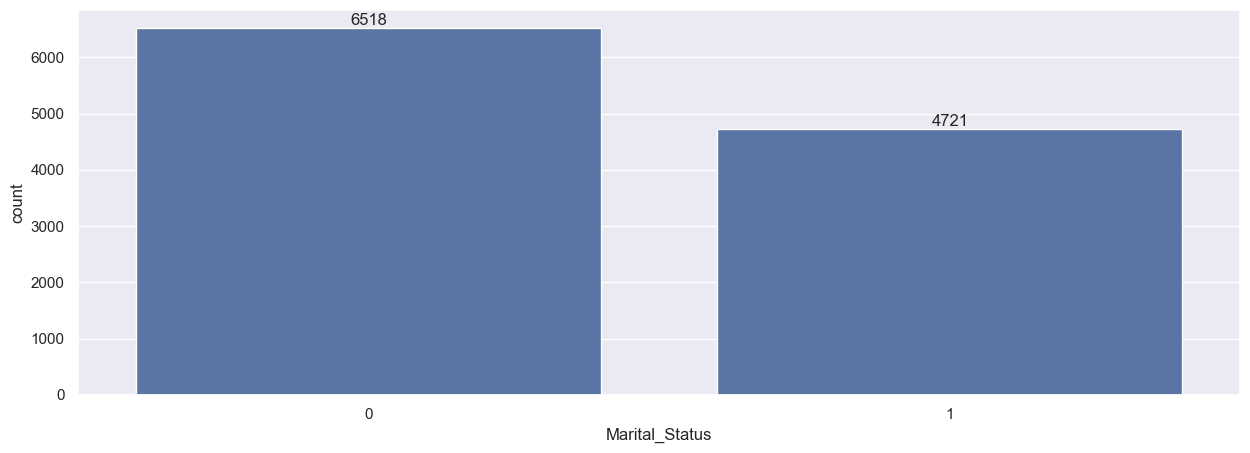

In [22]:
MS = sns.countplot(data = df,x = "Marital_Status")

sns.set(rc={"figure.figsize":(7,5)})
for bars in MS.containers:
    MS.bar_label(bars) 

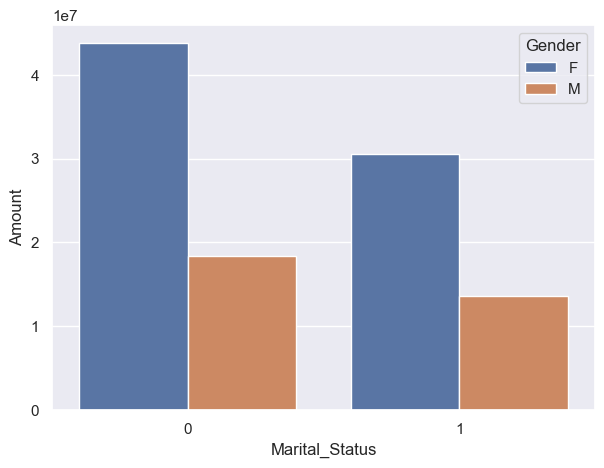

In [23]:
sale_Ms = df.groupby(["Marital_Status","Gender"], as_index=False)["Amount"].sum().sort_values(by = "Amount",ascending=False)
#print(sale_Ms)
ss =sns.barplot(data= sale_Ms,x = "Marital_Status",y = "Amount",hue="Gender")

we can see most of buyer are married(women,age group 24-36)


In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\Deepa\AppData\Local\Temp\ipykernel_6620\1421486452.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  occ = sns.countplot(data = df,x = "Occupation",palette="colorblind")


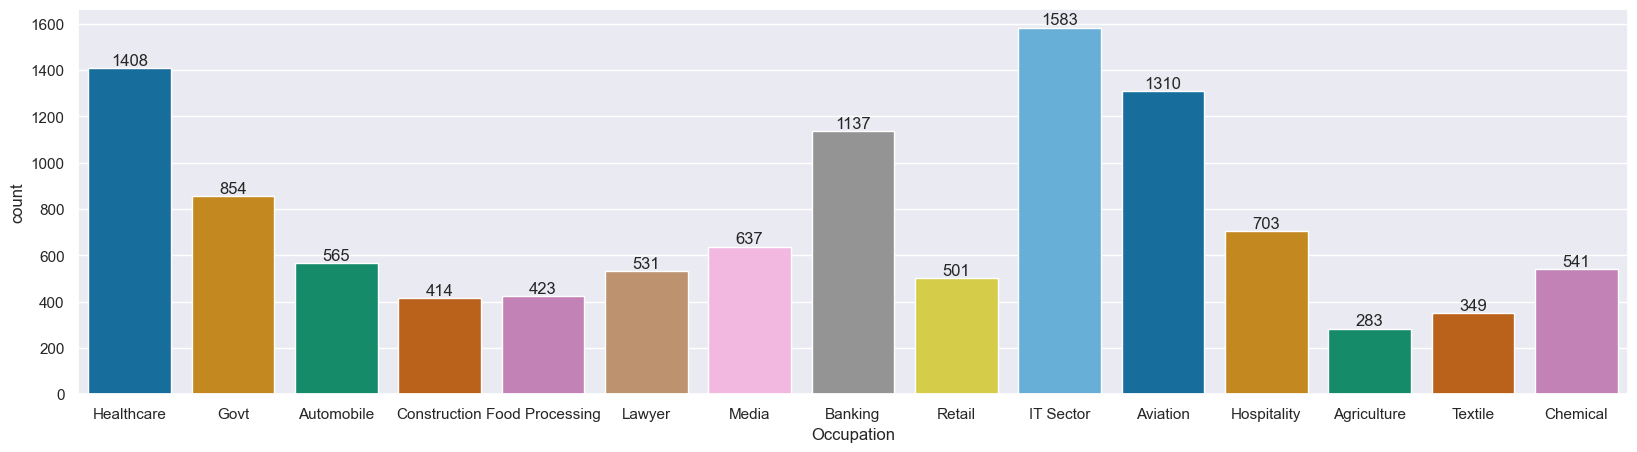

In [25]:
sns.set(rc={"figure.figsize":(20,5)})
occ = sns.countplot(data = df,x = "Occupation",palette="colorblind")
for bars in occ.containers:
    occ.bar_label(bars)

C:\Users\Deepa\AppData\Local\Temp\ipykernel_6620\972446710.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sale_occ, x = "Occupation",y = "Amount",palette="viridis")


<Axes: xlabel='Occupation', ylabel='Amount'>

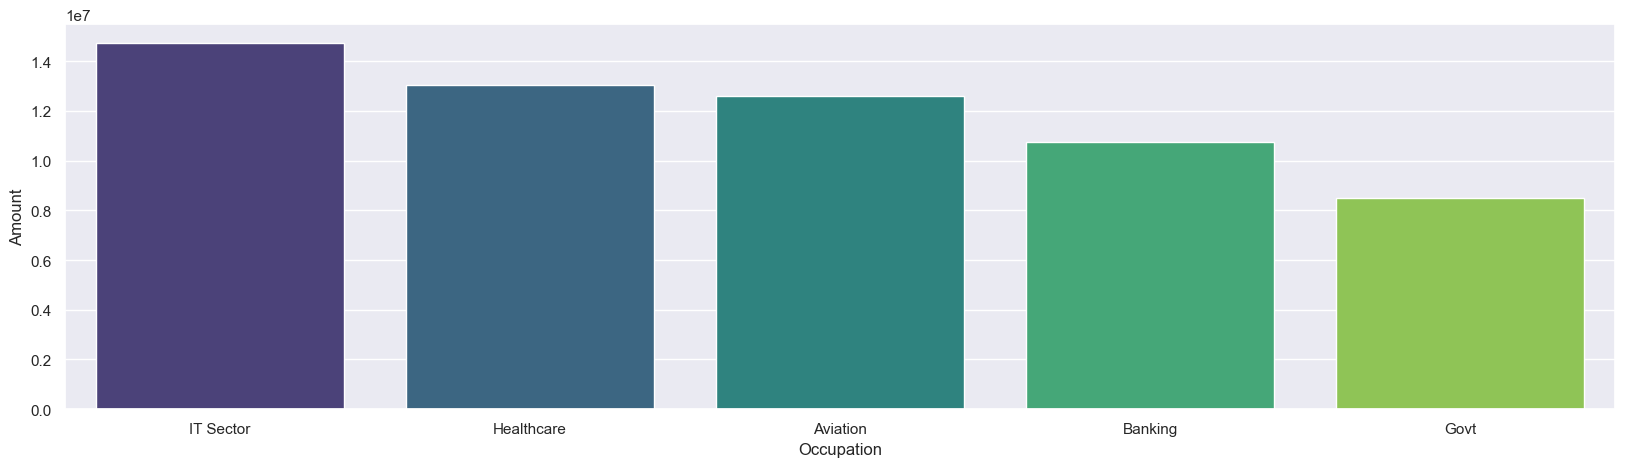

In [26]:
sale_occ = df.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by = "Amount",ascending=False).head(5)
sns.barplot(data = sale_occ, x = "Occupation",y = "Amount",palette="viridis")


=we can say that most of buyer are married women who woking in IT ,Healthcare and Aviation sector

In [27]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

C:\Users\Deepa\AppData\Local\Temp\ipykernel_6620\3984049696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  PC =  sns.countplot(data = df,x = "Product_Category",palette="pastel")


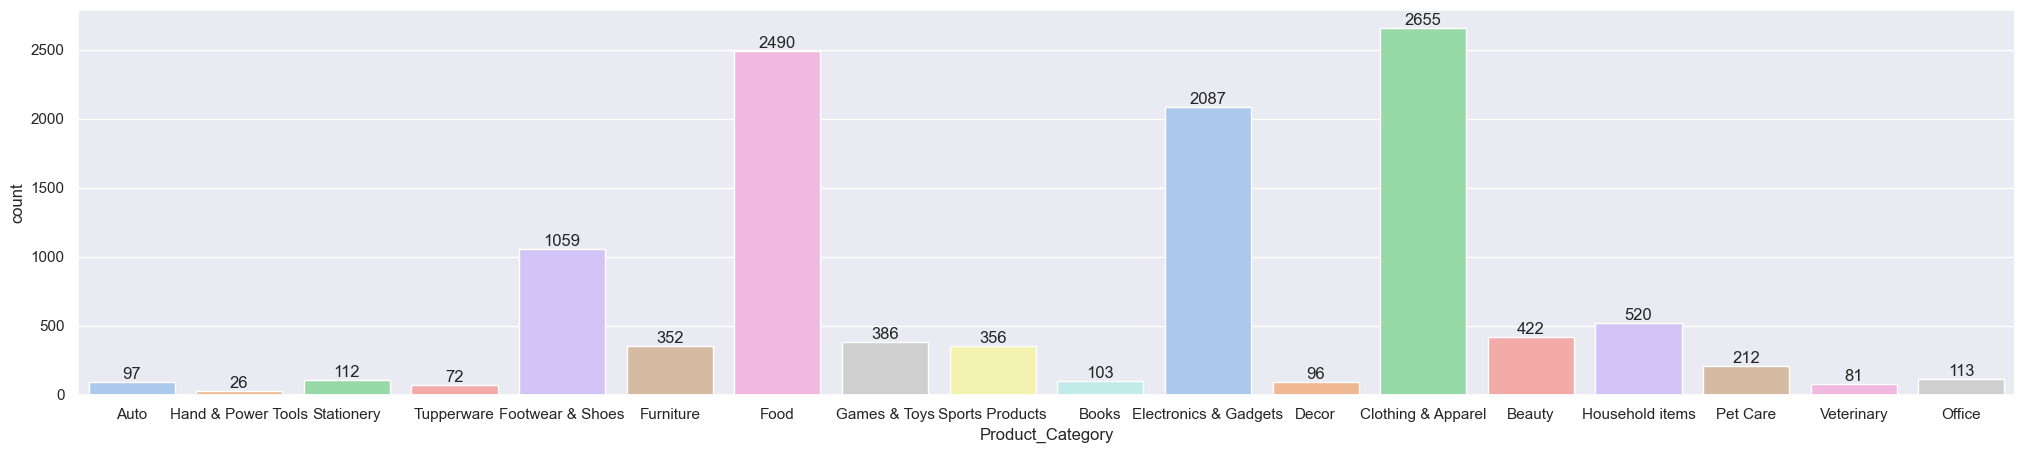

In [28]:
sns.set(rc={"figure.figsize": (25,5)})
PC =  sns.countplot(data = df,x = "Product_Category",palette="pastel")
for bars in PC.containers:
    PC.bar_label(bars)


C:\Users\Deepa\AppData\Local\Temp\ipykernel_6620\800235842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sale_PC, x = "Product_Category",y = "Amount",palette="bright")


<Axes: xlabel='Product_Category', ylabel='Amount'>

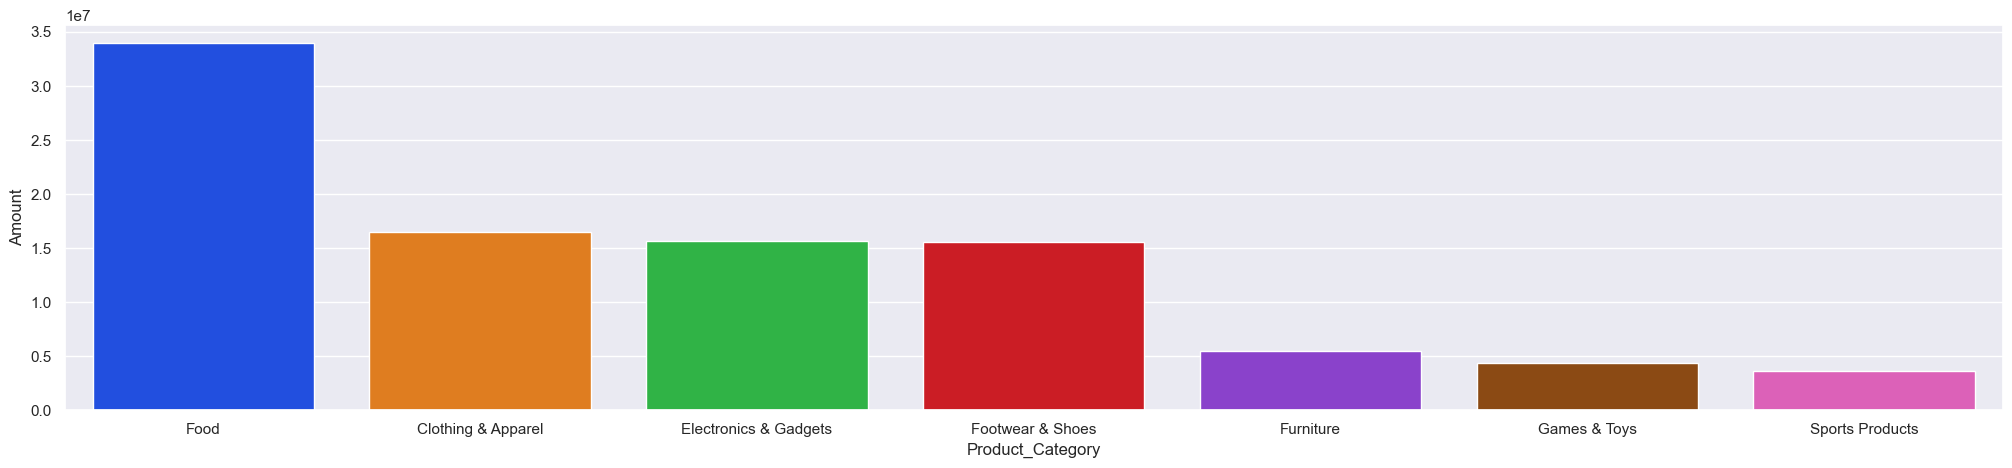

In [29]:
sale_PC = df.groupby(["Product_Category"], as_index=False)["Amount"].sum().sort_values(by = "Amount",ascending=False).head(7)
sns.barplot(data = sale_PC, x = "Product_Category",y = "Amount",palette="bright")


In [30]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

 We can say that married women age group 26-35 yrs from UP,Maharastra and Karnataka working in IT,Healthcare and Aviation are more likely to buy products form food , clothing and Electronics category

Additionally, I utilized ChatGPT for insights and Python libraries like Pandas, NumPy, Matplotlib, and Seaborn to analyze the Diwali sales data effectively, ensuring a comprehensive approach to improving customer experience and boosting sales.